<a href="https://colab.research.google.com/github/awgimenes/Deep-Learning/blob/main/DEEP_LEARNING_TAREFA_TRILHA_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DEEP LEARNING
Tarefa trilha 6 - 
Anderson Willians Gimenes - 10992120393

https://colab.research.google.com/drive/1VKFhveitNNEIcrPrquQPeOfnEYQuUrwd?usp=sharing

In [1]:
#importando as blibiotecas a serem utilizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
import tqdm
import torch
import torch.nn as nn
from torch.autograd import Variable

In [2]:
#@title Execute antes de seguir.
#@markdown Funções pré-definidas de report de classificação e plot da curva de aprendizado.

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
def print_results(y_test, y_pred):
  print('\nConfusion Matrix: \n\n', confusion_matrix(y_test, y_pred))
  print('\nClassification Report: \n\n', classification_report(y_test, y_pred))
  print('\nAccuracy Score: \n\n', accuracy_score(y_test, y_pred), '\n')
  return

def display_acc_hist(history):
  history_df = pd.DataFrame(history.history)
  print('\n\nLearning Curve... \n\n')
  print('\n', history_df.head())
  # Start the plot at epoch 0
  history_df.loc[0:, ['loss', 'val_loss']].plot()
  history_df.loc[0:, [history_df.columns[1], history_df.columns[3]]].plot()

  print(("\nBest Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df[history_df.columns[2]].min(), 
              history_df[history_df.columns[3]].max()))
  print('\n ')
  return

# print_results(y_test_one, y_pred_one)
# display_acc_hist(history)

In [3]:
#Adquirindo o dataset

ds = pd.read_csv('https://github.com/awgimenes/Deep-Learning/raw/main/student_mat_edit.csv', delimiter=';')

In [4]:
#Visualizando os dados

display(ds)

,sex (M=1/F=0),age,P_s101us (Presen1=1/0use=0),Mother_edu,Father_edu,guardian,schoolsup(Y=1/N=0),famsup(Y=1/N=0),paid(Y=1/N=0),activities(Y=1/N=0),...,internet(Y=1/N=0),romantic(Y=1/N=0),famrel,freetime,goout,Dalc,Walc,health,G3,S_Type
0,0,18,0,4,4,mother,1,0,0,0,...,0,0,4,3,4,1,1,3,6,Bad
1,0,17,1,1,1,father,0,1,0,0,...,1,0,5,3,3,1,1,3,6,Bad
2,0,15,1,1,1,mother,1,0,1,0,...,1,0,4,3,2,2,3,3,10,Bad
3,0,15,1,4,2,mother,0,1,1,1,...,1,1,3,2,2,1,1,5,15,Good
4,0,16,1,3,3,father,0,1,1,0,...,0,0,4,3,2,1,2,5,10,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,20,0,2,2,other,0,1,1,0,...,0,0,5,5,4,4,5,4,9,Bad
391,1,17,1,3,1,mother,0,0,0,0,...,1,0,2,4,5,3,4,2,16,Good
392,1,21,1,1,1,other,0,0,0,0,...,0,0,5,5,3,3,3,3,7,Bad
393,1,18,1,3,2,mother,0,0,0,0,...,1,0,4,4,1,3,4,5,10,Bad


In [5]:
# Verificando nulos, quantidades e tipos de dados
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   sex (M=1/F=0)                395 non-null    int64 
 1   age                          395 non-null    int64 
 2   P_s101us (Presen1=1/0use=0)  395 non-null    int64 
 3   Mother_edu                   395 non-null    int64 
 4   Father_edu                   395 non-null    int64 
 5   guardian                     395 non-null    object
 6   schoolsup(Y=1/N=0)           395 non-null    int64 
 7   famsup(Y=1/N=0)              395 non-null    int64 
 8   paid(Y=1/N=0)                395 non-null    int64 
 9   activities(Y=1/N=0)          395 non-null    int64 
 10  nursery(Y=1/N=0)             395 non-null    int64 
 11  higher(Y=1/N=0)              395 non-null    int64 
 12  internet(Y=1/N=0)            395 non-null    int64 
 13  romantic(Y=1/N=0)            395 no

In [6]:
#Conferindo quais são as minhas features (colunas)
print(ds.columns)

Index(['sex (M=1/F=0)', 'age', 'P_s101us (Presen1=1/0use=0)', 'Mother_edu',
       'Father_edu', 'guardian', 'schoolsup(Y=1/N=0)', 'famsup(Y=1/N=0)',
       'paid(Y=1/N=0)', 'activities(Y=1/N=0)', 'nursery(Y=1/N=0)',
       'higher(Y=1/N=0)', 'internet(Y=1/N=0)', 'romantic(Y=1/N=0)', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'G3', 'S_Type'],
      dtype='object')


In [7]:
#Discretizando os valores da coluna 'guardian'
ds2 = pd.get_dummies(ds,columns=['guardian'])

In [8]:
#Imprimindo o novo dataset ds2
ds2

,sex (M=1/F=0),age,P_s101us (Presen1=1/0use=0),Mother_edu,Father_edu,schoolsup(Y=1/N=0),famsup(Y=1/N=0),paid(Y=1/N=0),activities(Y=1/N=0),nursery(Y=1/N=0),...,freetime,goout,Dalc,Walc,health,G3,S_Type,guardian_father,guardian_mother,guardian_other
0,0,18,0,4,4,1,0,0,0,1,...,3,4,1,1,3,6,Bad,0,1,0
1,0,17,1,1,1,0,1,0,0,0,...,3,3,1,1,3,6,Bad,1,0,0
2,0,15,1,1,1,1,0,1,0,1,...,3,2,2,3,3,10,Bad,0,1,0
3,0,15,1,4,2,0,1,1,1,1,...,2,2,1,1,5,15,Good,0,1,0
4,0,16,1,3,3,0,1,1,0,1,...,3,2,1,2,5,10,Bad,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,20,0,2,2,0,1,1,0,1,...,5,4,4,5,4,9,Bad,0,0,1
391,1,17,1,3,1,0,0,0,0,0,...,4,5,3,4,2,16,Good,0,1,0
392,1,21,1,1,1,0,0,0,0,0,...,5,3,3,3,3,7,Bad,0,0,1
393,1,18,1,3,2,0,0,0,0,0,...,4,1,3,4,5,10,Bad,0,1,0


In [9]:
#Conferindo o resultado
ds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   sex (M=1/F=0)                395 non-null    int64 
 1   age                          395 non-null    int64 
 2   P_s101us (Presen1=1/0use=0)  395 non-null    int64 
 3   Mother_edu                   395 non-null    int64 
 4   Father_edu                   395 non-null    int64 
 5   schoolsup(Y=1/N=0)           395 non-null    int64 
 6   famsup(Y=1/N=0)              395 non-null    int64 
 7   paid(Y=1/N=0)                395 non-null    int64 
 8   activities(Y=1/N=0)          395 non-null    int64 
 9   nursery(Y=1/N=0)             395 non-null    int64 
 10  higher(Y=1/N=0)              395 non-null    int64 
 11  internet(Y=1/N=0)            395 non-null    int64 
 12  romantic(Y=1/N=0)            395 non-null    int64 
 13  famrel                       395 no

In [10]:
#percebemos que a base de dados não é equilibrada, mas está proximo disto, não vou equilibrar para poder ver qual resultado vamos obter
ds2.S_Type.value_counts()

Good    209
Bad     186
Name: S_Type, dtype: int64

In [11]:
X = ds2.drop(columns=['S_Type'])
y = ds2[['S_Type']]
colunas_X = X.columns.to_list()

In [12]:
# Encode, para classificação

y = y.replace({'Bad':0,'Good':1})

In [13]:
# Scale normalização dos dados

scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)


In [14]:
#Transformando y em matrix
y = np.array(y)

In [15]:
#Visualizando o resultado

print('\nEntradas para o Treinamento, X...\n')
display(X)
print('\nSaídas para o Treinamento, y....\n')
display(y[0:10])


Entradas para o Treinamento, X...



array([[0.        , 0.42857143, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.28571429, 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [1.        , 0.85714286, 1.        , ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.42857143, 1.        , ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.57142857, 1.        , ..., 1.        , 0.        ,
        0.        ]])


Saídas para o Treinamento, y....



array([[0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1]])

In [16]:
# Conjuntos de Treinamento e Teste
#-------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [17]:
# Define o Modelo
#-------------------------------------------------------------------------------
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 1)
        
    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = torch.sigmoid(self.layer3(x))       
        return x

In [18]:
# Executa o Modelo
#-------------------------------------------------------------------------------
model     = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.BCELoss()
model

Model(
  (layer1): Linear(in_features=23, out_features=50, bias=True)
  (layer2): Linear(in_features=50, out_features=50, bias=True)
  (layer3): Linear(in_features=50, out_features=1, bias=True)
)

In [19]:
# Treina o Modelo
#-------------------------------------------------------------------------------
X_train = Variable(torch.from_numpy(X_train)).float()
y_train = Variable(torch.from_numpy(y_train)).float()

X_test  = Variable(torch.from_numpy(X_test)).float()
y_test  = Variable(torch.from_numpy(y_test)).long()

EPOCHS  = 100

loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train.reshape(-1,1))
    loss_list[epoch] = loss.item()
    
    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    with torch.no_grad():
        y_pred = model(X_test)
        correct = (y_pred[:,0] > 0.5) == y_test
        accuracy_list[epoch] = correct.sum() / len(correct)

100%|██████████| 100/100 [00:00<00:00, 707.57it/s]


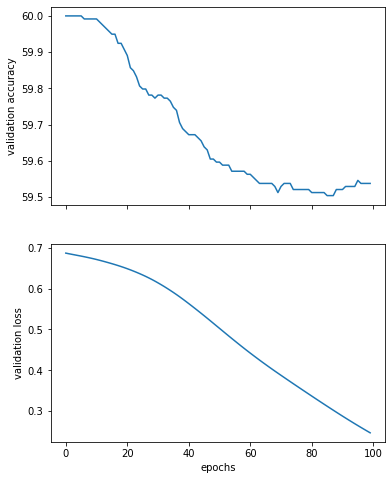

In [20]:
#Visualizando o resultado
def plot_history(loss_list,  accuracy_list):
  fig, (ax1, ax2) = plt.subplots(2, figsize=(6, 8), sharex=True)

  ax1.plot(accuracy_list)
  ax1.set_ylabel("validation accuracy")
  ax2.plot(loss_list)
  ax2.set_ylabel("validation loss")
  ax2.set_xlabel("epochs")
  plt.show()

  return

plot_history(loss_list,  accuracy_list) 

In [21]:
#Avaliando o resultado
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test.detach().numpy(), y_pred.detach().numpy() > 0.5 ))

0.865546218487395


Mesmo com a base um pouco desbalanceada, conseguimos um bom resultado com o modelo empregado, obtendo uma acurácia de 0,86. 